# Customer clustering for Marketing purpose using unsupervised K-means algorithm so that company can target particular customers.

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Load data

In [2]:
data_df=pd.read_csv('dataset.csv')
print(data_df)
type(data_df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

pandas.core.frame.DataFrame

Preprocess data
Count null values

In [3]:
data_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Replace null values in a column by average of all values in that column

In [4]:
data_df.update(data_df['MINIMUM_PAYMENTS'].fillna(value=data_df['MINIMUM_PAYMENTS'].mean(), inplace=True))
data_df.update(data_df['CREDIT_LIMIT'].fillna(value=data_df['CREDIT_LIMIT'].mean(), inplace=True))

In [5]:
data_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Eliminate duplicates

In [5]:
data_df.drop_duplicates()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Eliminate columns that will not be helpful in data analysis

In [6]:
data_df.drop('CUST_ID',axis=1,inplace=True)
data_df.shape

(8950, 17)

Standardize data

In [7]:
scaler= StandardScaler()
scaled_data_df= scaler.fit_transform(data_df)
print(scaled_data_df)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


In [8]:
pca=PCA(n_components=2)
df=pca.fit_transform(scaled_data_df)
print(df)

[[-1.68222448 -1.07644573]
 [-1.13829761  2.50647642]
 [ 0.96969069 -0.38352295]
 ...
 [-0.92620883 -1.81077826]
 [-2.33655351 -0.65796473]
 [-0.55640871 -0.40048335]]


In [11]:
kmeans=KMeans(n_clusters=5)
labels=kmeans.fit_predict(scaled_data_df)
print(labels)

[1 4 0 ... 2 1 1]


In [12]:
unique_labels=np.unique(labels)
unique_labels

array([0, 1, 2, 3, 4])

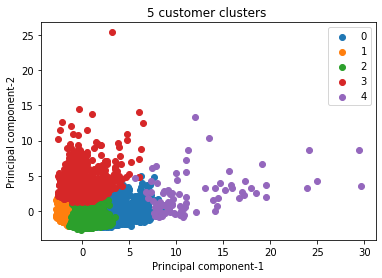

In [13]:
for i in unique_labels : 
    plt.scatter(df[label==i,0],df[label==i,1],label=i)
plt.xlabel('Principal component-1')
plt.ylabel('Principal component-2')
plt.title('5 customer clusters ')
plt.legend()
plt.show()